In [1]:

from src.dataset import Raven
from src.model import CLIP
from PIL import Image
import numpy as np
import requests
import matplotlib.pyplot as plt
import cv2
from src.const import SHAPES, ANGLES, SIZES, COLORS

%matplotlib inline

In [2]:
PATH = './dataset/RAVEN-10000/'
fig_types = ['center_single']

In [3]:
test_set = Raven(PATH, 'test', fig_types[0])
test_set.load_data()

Loading item: 0


In [4]:
item = test_set.items[0]
print(item.images[0][50])

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255   0   0   0  56  56  56  56  56  56  56  56  56  56  56
  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56
  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56
  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56
  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56
  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56  56
  56  56  56  56  56  56  56  56  56  56   0   0   0 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]


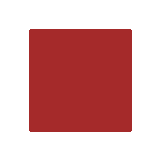

In [13]:
test_set.get_puzzle(0)[14]

In [6]:
net = CLIP(model_name="openai/clip-vit-base-patch32")

In [17]:
template_angle = ['Figure is oriented at {} degrees'.format(value) for value in ANGLES.values()]
template_color = ['The color of the figure is {}'.format(value) for value in COLORS.values()]
template_sizes = ['The figure is {}'.format(value) for value in SIZES.values()]
template_type = ['The figure is shaped as a {}'.format(value) for value in SHAPES.values()]

In [18]:
answers = []

for i in range(test_set.len()):
    puzzle = test_set.get_puzzle(i)
    puzzle_answers = {}
    for j, c_image in enumerate(puzzle):
        inter = {}
        inter['Angle'] = (net.forward(c_image, template_angle)).split()[-2]
        inter['Color'] = (net.forward(c_image, template_color)).split()[-1]
        inter['Size'] = (net.forward(c_image, template_sizes)).split()[-1]
        inter['Type'] = (net.forward(c_image, template_type)).split()[-1]
        puzzle_answers[j] = inter
        
    answers.append(puzzle_answers)

In [19]:
print(answers)

[{0: {'Angle': '180', 'Color': 'purple', 'Size': 'medium', 'Type': 'circle'}, 1: {'Angle': '180', 'Color': 'pink', 'Size': 'medium', 'Type': 'circle'}, 2: {'Angle': '180', 'Color': 'teal', 'Size': 'medium', 'Type': 'circle'}, 3: {'Angle': '45', 'Color': 'red', 'Size': 'medium', 'Type': 'hexagon'}, 4: {'Angle': '45', 'Color': 'orange', 'Size': 'medium', 'Type': 'hexagon'}, 5: {'Angle': '45', 'Color': 'purple', 'Size': 'medium', 'Type': 'hexagon'}, 6: {'Angle': '180', 'Color': 'blue', 'Size': 'medium', 'Type': 'square'}, 7: {'Angle': '180', 'Color': 'yellow', 'Size': 'medium', 'Type': 'square'}, 8: {'Angle': '180', 'Color': 'cyan', 'Size': 'medium', 'Type': 'square'}, 9: {'Angle': '180', 'Color': 'cyan', 'Size': 'medium', 'Type': 'circle'}, 10: {'Angle': '180', 'Color': 'cyan', 'Size': 'medium', 'Type': 'triangle'}, 11: {'Angle': '45', 'Color': 'green', 'Size': 'medium', 'Type': 'square'}, 12: {'Angle': '180', 'Color': 'cyan', 'Size': 'medium', 'Type': 'square'}, 13: {'Angle': '180', 'Co

In [10]:
test_set.get_answers(0)

{0: {'Angle': '180',
  'Color': 'purple',
  'Size': 'extra_large',
  'Type': 'circle'},
 1: {'Angle': '180', 'Color': 'pink', 'Size': 'extra_large', 'Type': 'circle'},
 2: {'Angle': '180', 'Color': 'teal', 'Size': 'extra_large', 'Type': 'circle'},
 3: {'Angle': '-135', 'Color': 'brown', 'Size': 'small', 'Type': 'hexagon'},
 4: {'Angle': '-135', 'Color': 'orange', 'Size': 'small', 'Type': 'hexagon'},
 5: {'Angle': '-135', 'Color': 'purple', 'Size': 'small', 'Type': 'hexagon'},
 6: {'Angle': '180', 'Color': 'blue', 'Size': 'huge', 'Type': 'square'},
 7: {'Angle': '180', 'Color': 'yellow', 'Size': 'huge', 'Type': 'square'},
 8: {'Angle': '180', 'Color': 'cyan', 'Size': 'large', 'Type': 'square'},
 9: {'Angle': '180', 'Color': 'cyan', 'Size': 'huge', 'Type': 'circle'},
 10: {'Angle': '180', 'Color': 'cyan', 'Size': 'huge', 'Type': 'triangle'},
 11: {'Angle': '180', 'Color': 'green', 'Size': 'huge', 'Type': 'square'},
 12: {'Angle': '180',
  'Color': 'cyan',
  'Size': 'extra_large',
  'Type

In [ ]:
test_set.plot_puzzle(0)